In [23]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from practical_b_1 import ImageDataset,SortedImageDataset,NormalDataset
from load_mnist import load_mnist
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [24]:
criterion = nn.CrossEntropyLoss()
batch_size = 64
c=10
EPOCHS = 5
input_size = 28*28
output_size=10
loss_function = nn.NLLLoss()
num_neurons=(50,20)

In [25]:
class Network(nn.Module):
    def __init__(self,num_neurons,input_size,output_size,activation=nn.ReLU()):
        super().__init__()
        self.conv = nn.Sequential()
        self.conv.add_module('hidden layer 0 ',
        nn.Linear( input_size,num_neurons[0]))
        self.conv.add_module('activation # 0 ',activation)

        for i in range(1,len(num_neurons)):
            
            self.conv.add_module('hidden_layer # {}'.format(i),nn.Linear(num_neurons[i-1],num_neurons[i]))
            
            self.conv.add_module('activation # {}'.format(i),activation)
        
        self.conv.add_module('output',
        nn.Linear(num_neurons[len(num_neurons)-1], output_size))
        print(self.conv)
    
    def forward(self, x):
        return nn.Softmax(dim=0)(self.conv(x))

train the model

In [26]:
def train(model, dataloader: DataLoader, optimizer):
    
    epoch_loss=0.0
    for batch, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(images.view(-1, input_size))
        output=output.float()
        loss = loss_function(output.squeeze(), labels.long())
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    epoch_loss = epoch_loss / len(dataloader)
    print('loss :{}'.format(loss))    


train loop

In [27]:
def trainloop(dataloader, model, optimizer,EPOCHS):
    for epoch in range(EPOCHS):
        train(dataloader=dataloader, model=model, optimizer=optimizer)

Intialize model,optimizer,trainDataset,testDataset,traindataloader,testdataloader

In [28]:
model = Network(num_neurons=num_neurons,input_size=input_size,output_size=output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)


In [29]:
def test_model(test_loader:DataLoader,EPOCHS:int,model):
    model.eval()
    accuracies=[]
    for epoch in range(EPOCHS):                                             
        with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    outputs = model(images.view(-1, input_size))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                    
                accuracies.append(  (100 * correct / total))
                print('Accuracy : %d %%' % (100 * correct / total))

    plt.plot(range(EPOCHS),accuracies,'b-o',label='Accuracy');
    plt.legend()
    plt.show()        
    return accuracies            

### 2.1
#### a
Train the classes separately, i.e. filter the dataset and train for five epochs
on all images depicting a 0, then on all images depicting a 1, and so on.

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333395421505
loss :-0.02083333395421505
loss :-0.020833337679505348
loss :-0.02083333395421505
loss :-0.0208333358168602
test label: 0
Accuracy : 6 %
Accuracy : 6 %
Accuracy : 7 %
Accuracy : 6 %
Accuracy : 6 %


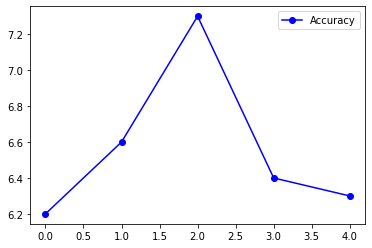

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333395421505
loss :-0.02083333022892475
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
test label: 1
Accuracy : 10 %
Accuracy : 11 %
Accuracy : 9 %
Accuracy : 10 %
Accuracy : 10 %


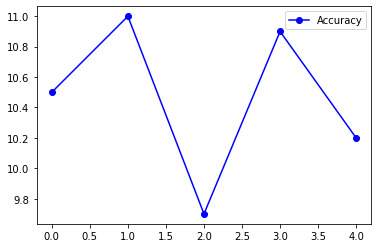

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.0208333358168602
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
test label: 2
Accuracy : 7 %
Accuracy : 6 %
Accuracy : 8 %
Accuracy : 9 %
Accuracy : 6 %


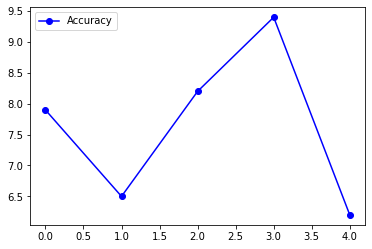

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.0208333358168602
loss :-0.0208333358168602
loss :-0.0208333358168602
loss :-0.0208333358168602
loss :-0.0208333358168602
test label: 3
Accuracy : 10 %
Accuracy : 8 %
Accuracy : 7 %
Accuracy : 8 %
Accuracy : 7 %


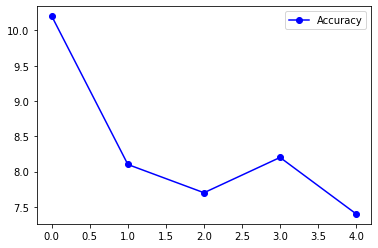

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.0208333358168602
loss :-0.02083333395421505
loss :-0.0208333358168602
loss :-0.0208333358168602
loss :-0.02083333395421505
test label: 4
Accuracy : 9 %
Accuracy : 9 %
Accuracy : 10 %
Accuracy : 10 %
Accuracy : 10 %


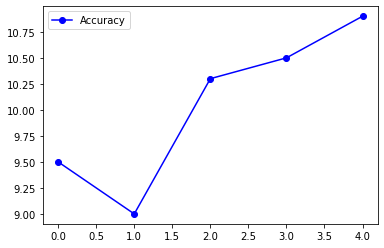

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
test label: 5
Accuracy : 23 %
Accuracy : 19 %
Accuracy : 21 %
Accuracy : 24 %
Accuracy : 21 %


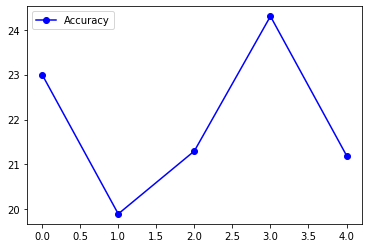

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
loss :-0.0208333320915699
test label: 6
Accuracy : 24 %
Accuracy : 23 %
Accuracy : 25 %
Accuracy : 24 %
Accuracy : 23 %


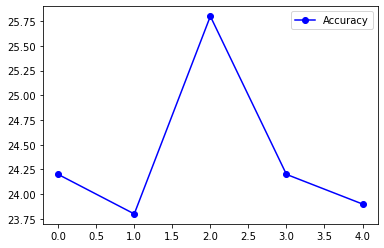

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333022892475
loss :-0.020833326503634453
loss :-0.020833326503634453
loss :-0.02083333022892475
loss :-0.02083333022892475
test label: 7
Accuracy : 5 %
Accuracy : 6 %
Accuracy : 6 %
Accuracy : 6 %
Accuracy : 5 %


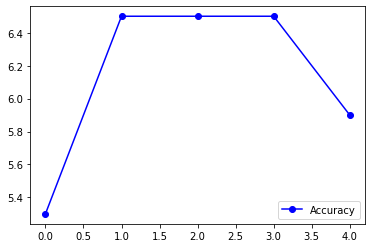

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
loss :-0.02083333022892475
test label: 8
Accuracy : 3 %
Accuracy : 3 %
Accuracy : 3 %
Accuracy : 2 %
Accuracy : 3 %


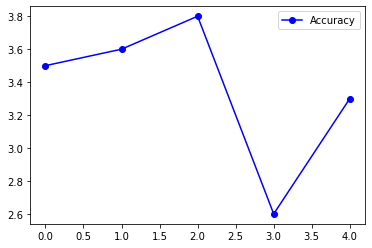

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.02083333395421505
loss :-0.02083333395421505
loss :-0.02083333395421505
loss :-0.02083333395421505
loss :-0.02083333395421505
test label: 9
Accuracy : 6 %
Accuracy : 7 %
Accuracy : 6 %
Accuracy : 7 %
Accuracy : 6 %


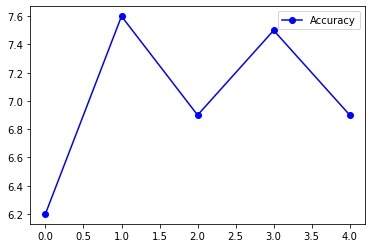

In [30]:
def train_classes_separtely_task_a():
    classes = range(c)
    for label in classes:
        model_b = Network(num_neurons=num_neurons,input_size=input_size,output_size=output_size)
        trainDataset = ImageDataset(type='training', label=label)
        data_loader = DataLoader(trainDataset, batch_size=batch_size,shuffle=False, drop_last=False)
        trainloop(dataloader=data_loader, model=model,
                optimizer=optimizer, EPOCHS=5)
        testingDataset = ImageDataset(type='testing', label=label)
        test_loader = DataLoader(testingDataset, batch_size=batch_size,shuffle=True, drop_last=False)
        print('test label: {}'.format(label))
        test_model(model=model_b,EPOCHS=EPOCHS,test_loader=test_loader)
train_classes_separtely_task_a()                           

### 2.1
#### b
Sort the images by class and train them in order for 25 epochs. Make sure
that the DataLoader is not shuffling the data.

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
loss :-0.0312500037252903
Accuracy : 14 %
Accuracy : 14 %
Accuracy : 14 %
Accuracy : 14 %
Accuracy

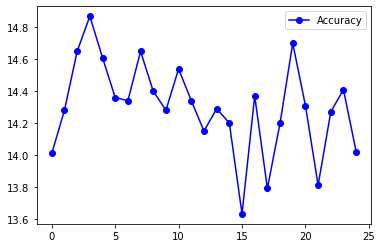

In [31]:
def train_sorted_without_shuffule_task_b():
    sortedDataSet=SortedImageDataset('training')
    sortedDataSetLoader = DataLoader(sortedDataSet, batch_size=batch_size,
                                                shuffle=False, drop_last=False)
    model_b = Network(num_neurons=num_neurons,input_size=input_size,output_size=output_size,activation=nn.ReLU())
    sortedEpoch=25
    trainloop(dataloader=sortedDataSetLoader, model=model_b,
                optimizer=optimizer, EPOCHS=sortedEpoch)    

    ggg=SortedImageDataset(type='testing')
    test_loader = DataLoader(ggg, batch_size=batch_size,shuffle=True, drop_last=False)
    test_model(model=model_b,EPOCHS=sortedEpoch,test_loader=test_loader)
train_sorted_without_shuffule_task_b()                                         

### 2.1
#### c
Shuffle the images every epoch and train them for 25 epochs

Sequential(
  (hidden layer 0 ): Linear(in_features=784, out_features=50, bias=True)
  (activation # 0 ): ReLU()
  (hidden_layer # 1): Linear(in_features=50, out_features=20, bias=True)
  (activation # 1): ReLU()
  (output): Linear(in_features=20, out_features=10, bias=True)
)
loss :-0.020158080384135246
loss :-0.005319010466337204
loss :-0.016300207003951073
loss :-0.0018326647114008665
loss :-0.0483025461435318
loss :-0.0455491803586483
loss :-0.006051708944141865
loss :-0.028999067842960358
loss :-0.01887536235153675
loss :-0.03886478394269943
loss :-0.014541125856339931
loss :-0.03967513516545296
loss :-0.03116307035088539
loss :-0.024512529373168945
loss :-0.05762927606701851
loss :-0.0009350182954221964
loss :-0.011244215071201324
loss :-0.011746197938919067
loss :-0.050713181495666504
loss :-0.005833258852362633
loss :-0.046272628009319305
loss :-0.017657842487096786
loss :-0.004607208538800478
loss :-0.017856789752840996
loss :-0.007926763035356998
Accuracy : 8 %
Accuracy : 8 %

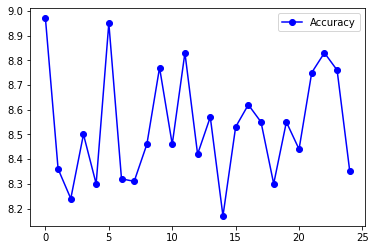

In [32]:
def train_with_shuffule_task_c():
    normalData=NormalDataset('training')

    normalDataSetLoader = DataLoader(normalData, batch_size=batch_size,
                                                shuffle=True, drop_last=False)
    model_c = Network(num_neurons=num_neurons,input_size=input_size,output_size=output_size)

    sortedEpoch=25

    trainloop(dataloader=normalDataSetLoader, model=model_c,
                optimizer=optimizer, EPOCHS=sortedEpoch)

    ggg=NormalDataset(type='testing')

    test_loader = DataLoader(ggg, batch_size=batch_size,shuffle=True, drop_last=False)

    test_model(model=model_c,EPOCHS=sortedEpoch,test_loader=test_loader)
train_with_shuffule_task_c()

Result 
from the above result we noticed that number C  is the best and it get higher accuracy than a and b and that due to shuffling the data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d525717-702e-4285-81d5-cd5945dff109' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>